In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/kaggle/input/utilscript')
from utils import plot_points, plot_decision_boundary

# Data Creation for Task 1 and Task 2

In [74]:

input_values = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

nor_output = np.array([[1], [0], [0], [0]])
nand_output = np.array([[1], [1], [1], [0]])
xor_output = np.array([[0], [1], [1], [0]])
xnor_output = np.array([[1], [0], [0], [1]])



Input shape: (4, 2)
NOR shape: (4, 1)
NAND shape: (4, 1)
XOR shape: (4, 1)
XNOR shape: (4, 1)


# Data Preprocessing Task 3

In [81]:

def augmentvectorgen(inputval, outputval):
    dataset = []
    for i in range(len(inputval)):
        augmented = [-1] + list(inputval[i])   
        if outputval[i][0] == 0:
            augmented[0] *= -1  # Flip first feature
            augmented[1] *= -1  # Flip second feature
            augmented[2] *= -1
        dataset.append(augmented)  # Store the new augmented vector
    return dataset

nor_augment = augmentvectorgen(input_values, nor_output)
nand_augment = augmentvectorgen(input_values, nand_output)
xor_augment = augmentvectorgen(input_values, xor_output)
xnor_augment = augmentvectorgen(input_values, xnor_output)


# Perceptron Training algorithm implementation Task 4

In [82]:
def helper(augvec, wt):
    for vec in augvec:
        val = vec[0]*wt[0] +vec[1]*wt[1] + vec[2]*wt[2]
        if val <= 0:
            return vec, False

    return None, True

    
def perceptronAlgorithm(augvector):
    wt = [1, 1, 1]
    j=0
    while j<1e5:
        j += 1
        vec, condn = helper(augvector, wt)
        # print(j, wt)
        if condn:
            return wt
        else:
            for i in range(len(wt)):
                wt[i] += vec[i]

    return wt

# Dicision Boundary of NAND and NOR Task 5

[-1 -2 -2]
[-4 -3 -2]


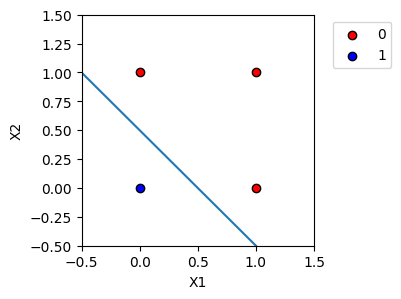

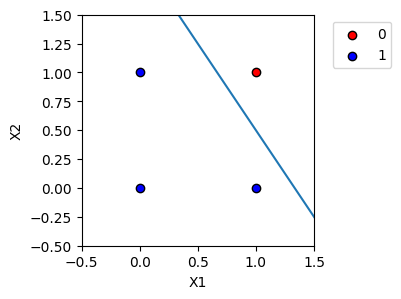

In [83]:
nor_wt = np.array(perceptronAlgorithm(nor_augment))
nand_wt = np.array(perceptronAlgorithm(nand_augment))
print(nor_wt)
print(nand_wt)

plot_decision_boundary(input_values, nor_output, nor_wt)
plot_decision_boundary(input_values, nand_output, nand_wt)

# Decision Boundary Plot of XOR and XNOR Task 6

[1 2 2]
[-1 -1 -2]


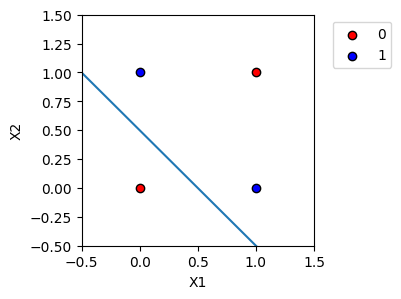

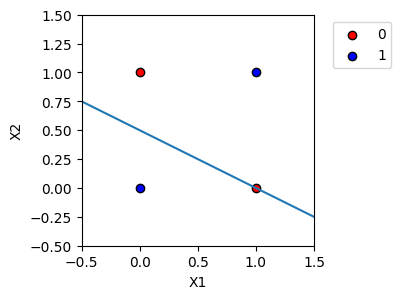

In [84]:
xor_wt = np.array(perceptronAlgorithm(xor_augment))
xnor_wt = np.array(perceptronAlgorithm(xnor_augment))
plot_decision_boundary(input_values, xor_output, xor_wt)
plot_decision_boundary(input_values, xnor_output, xnor_wt)

# Implementation of perceptron algorithm with sigmoid Task 7

In [110]:
def sigmoidfunc(a):
    return (1 / (1 + np.exp(-a)))


def perceptronAlgorithmSigmoid(augvector, outputval):
    # wt = np.array([1, 1, 1])
    wt = np.ones((3,),dtype=float)
    for iteration in range(100000):
        error_count = 0
        for i in range(len(augvector)):
            # Augment input with bias
            x = augvector[i]
            y_true = outputval[i][0]
             # dot product w.x
            a = np.dot(x, wt)

            # activation function sigmoid
            y_pred = sigmoidfunc(a)

            if y_pred > 0.9:
                y_pred_label = 1
            elif y_pred < 0.1:
                y_pred_label = 0
            else:
                y_pred_label = None  

            if y_pred_label is not None and y_pred_label != y_true:
                error_count += 1
                wt += (y_true - y_pred) * x  
        # if no error then stop
        if error_count == 0:
            break

    return wt



# Decision Boundary for NOR and NAND Task 8

[1. 1. 1.]
[1. 1. 1.]


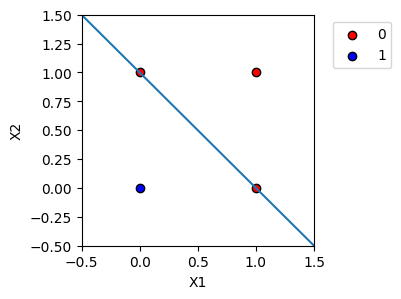

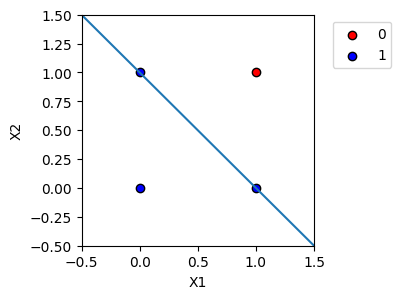

In [111]:
nor_wt = perceptronAlgorithmSigmoid(nor_augment, nor_output)
nand_wt = perceptronAlgorithmSigmoid(nand_augment, nand_output)
print(nor_wt)
print(nand_wt)

plot_decision_boundary(input_values, nor_output, nor_wt)
plot_decision_boundary(input_values, nand_output, nand_wt)

# Decision Boundary for XOR and XNOR Task 9

[1. 1. 1.]
[1. 1. 1.]


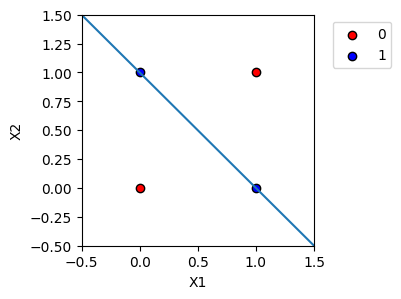

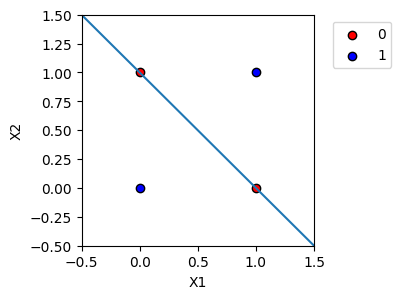

In [112]:
xor_wt = perceptronAlgorithmSigmoid(xor_augment, xor_output)
xnor_wt = perceptronAlgorithmSigmoid(xnor_augment, xnor_output)
print(xor_wt)
print(xnor_wt)
plot_decision_boundary(input_values, xor_output, xor_wt)
plot_decision_boundary(input_values, xnor_output, xnor_wt)